## Sumário:
- EDA 
- Treinamento
- Validação

## Objetivo
NCJNet é um modelo preditivo que visa sugerir cursos para o usuário, a predição é feito sob análise de notas e preferência do usuário.

## Configuração do Ambiente
É necessário o ambiente virtual para o funcionamento, para isso, realize os seguintes comandos no terminal
- /NCJNet$ pipenv shell
- /NCJNet$ pipenv install

Após isso, o ambiente está configurado com todas as bibliotecas necessárias. Para verificar, compile o código a baixo.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score
)

# Todas as bibliotecas são necessárias para a compilação

# EDA

In [35]:
import pandas as pd
import seaborn as sns

## Criar DataFrames dos Datasets 

In [36]:
# Carregar DataFrame de clientes (customers.csv)
df = pd.read_csv('./datasets/RegistroAcompanhamento.csv') # leitura dos dados do csv

# visualizar os dados dos 5 primeiros clientes
df.head(5)

,Identificador,"""Codigo externo do registro""",Etapa,"""Data da criacao""","""Momento do ultimo ganho""","""Momento da ultima perda""","""Na mesma etapa desde""","""Codigo - Oferta de curso""","""Nome - Oferta de curso""","""Identificador da pessoa""",...,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Curso
0,318,"""- - -""","""- - -""","""16/06/2025 20:02""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",360,...,90,89,88,86,87,99,86,85,89,Biblioteconomia
1,317,"""- - -""","""- - -""","""16/06/2025 20:00""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",359,...,76,76,75,79,78,90,73,80,81,Biblioteconomia
2,316,"""- - -""","""- - -""","""16/06/2025 19:59""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",358,...,63,63,61,59,60,83,74,73,76,Biblioteconomia
3,315,"""- - -""","""- - -""","""16/06/2025 19:57""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",357,...,69,71,70,69,66,89,68,64,66,Biblioteconomia
4,314,"""- - -""","""- - -""","""16/06/2025 19:55""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",356,...,71,89,63,68,87,88,89,90,91,Museologia


In [37]:
# Mostrar estrutura / schema do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Identificador                        300 non-null    object
 1    "Codigo externo do registro"        300 non-null    object
 2    Etapa                               300 non-null    object
 3    "Data da criacao"                   300 non-null    object
 4    "Momento do ultimo ganho"           300 non-null    object
 5    "Momento da ultima perda"           300 non-null    object
 6    "Na mesma etapa desde"              300 non-null    object
 7    "Codigo - Oferta de curso"          300 non-null    object
 8    "Nome - Oferta de curso"            300 non-null    object
 9    "Identificador da pessoa"           300 non-null    int64 
 10   "Codigo externo da pessoa"          300 non-null    object
 11   "Nome da pessoa"                    300 non-

### Selecionar apenas dados necessários

In [38]:
colunas_desejadas = [
	"Matematica",
	'"Portugues "', 
	"Literatura",
	"Redacao",
	"Quimica",
	"Fisica",
	"Biologia",
	"Geografia",
	"Historia",
	"Filosofia",
	"Sociologia",
	"Artes",
	'Area de Preferencia', 
	"Curso"
]

# Remover espaços dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar nomes das colunas após strip
print(df.columns.tolist())


# Agora filtrar as colunas
df_filtrado = df[colunas_desejadas]
df_filtrado.info()

['Identificador', '"Codigo externo do registro"', 'Etapa', '"Data da criacao"', '"Momento do ultimo ganho"', '"Momento da ultima perda"', '"Na mesma etapa desde"', '"Codigo - Oferta de curso"', '"Nome - Oferta de curso"', '"Identificador da pessoa"', '"Codigo externo da pessoa"', '"Nome da pessoa"', '"Nome do responsavel"', 'Atividade', '"E-mail da pessoa"', '"E-mails secundarios"', '"Telefone da pessoa"', '"Telefones secundarios"', 'CPF', '"Data de nascimento"', '"Valor da oportunidade"', '"Data da atividade"', '"Forma de ingresso"', '"Grau de instrucao"', '"Escola de origem"', '"Nota do ENEM"', '"Processo seletivo"', 'Unidade', 'Modalidade', 'Status', '"Local da oferta"', 'Canal', '"Resumo atual"', 'Objecao', '"Observacoes da perda"', 'Endereco', 'Numero', 'Bairro', 'Cidade', 'UF', 'Concorrentes', 'Probabilidade', '"[AE] Situacao de matricula"', 'Area de Preferencia', '"[AE] % de nota geral"', '"[AE] % de frequencia geral"', '"[AE] Satisfacao"', '"[AE] Qtd de lancamentos Vencidos"', 

In [39]:
df_filtrado.head(5)

,Matematica,"""Portugues """,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Area de Preferencia,Curso
0,82,96,98,90,89,88,86,87,99,86,85,89,Humanas,Biblioteconomia
1,80,90,89,76,76,75,79,78,90,73,80,81,Humanas,Biblioteconomia
2,65,78,80,63,63,61,59,60,83,74,73,76,Humanas,Biblioteconomia
3,70,90,88,69,71,70,69,66,89,68,64,66,Humanas,Biblioteconomia
4,74,72,69,71,89,63,68,87,88,89,90,91,Humanas,Museologia


In [40]:
#  Medidas estatísticas do DF
df_filtrado.describe()

,Matematica,"""Portugues """,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes
count,300.000000,300.000000,300.000000,300.000000,300.0000,300.00000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,80.233333,77.190000,77.546667,77.336667,78.4400,79.41000,79.600000,77.813333,78.776667,78.100000,78.35000,78.823333
std,11.578100,9.577735,9.072791,9.430435,10.1609,10.61402,10.555792,8.762864,8.803320,9.097943,9.98096,10.090168
min,58.000000,58.000000,59.000000,48.000000,52.0000,50.00000,43.000000,57.000000,60.000000,59.000000,41.00000,53.000000
25%,69.000000,68.000000,71.000000,70.000000,71.0000,72.00000,72.750000,72.000000,73.750000,73.000000,72.00000,71.000000
50%,80.000000,78.000000,78.000000,77.500000,79.0000,80.00000,80.000000,79.000000,79.000000,79.000000,79.00000,79.000000
75%,90.000000,85.000000,84.000000,84.000000,86.0000,88.25000,88.000000,82.000000,84.000000,84.000000,86.00000,87.000000
max,100.000000,99.000000,99.000000,99.000000,99.0000,99.00000,99.000000,98.000000,99.000000,98.000000,99.00000,99.000000


In [41]:
# Mapeando as áreas de cada curso
df = pd.read_csv('./datasets/RegistroAcompanhamento.csv', encoding='utf-8')
df.columns = df.columns.str.strip()
df['Curso'] = df['Curso'].astype(str).str.strip()
df['Area de Preferencia'] = df['Area de Preferencia'].astype(str).str.strip()

# Corrija encoding dos nomes dos cursos e áreas
df['Curso'] = df['Curso'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
df['Area de Preferencia'] = df['Area de Preferencia'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

areas_cursos = dict(zip(df['Curso'], df['Area de Preferencia']))

""" areas_cursos = {
    'Sociologia': 'Humanas',
    'Psicologia': 'Humanas',
    'Odontologia': 'Saúde',
    'Medicina Veterinária': 'Biológicas',
    'Medicina': 'Saúde',
    'Engenharia Elétrica': 'Exatas', 
    'Engenharia da Computação': 'Tecnologia',
    'Engenharia Civil': 'Exatas',
    'Enfermagem': 'Saúde',
    'Biologia': 'Biológicas',
    'Ciência da Computação': 'Tecnologia',
    'Arquitetura e Urbanismo': 'Exatas',
    'Direito': 'Humanas',
    'Design': 'Exatas',
    'Artes Visuais': 'Artes',
    'Engenharia de Produção': 'Exatas',
    'Engenharia Mecânica': 'Exatas',
    'Engenharia Química': 'Exatas',
    'Engenharia Ambiental': 'Exatas',
    'Engenharia de Alimentos': 'Exatas',
    'Engenharia de Software': 'Tecnologia',
    'Geografia': 'Humanas',
    'Filosofia': 'Humanas',
    'Química': 'Exatas',
    'Física': 'Exatas',
    'Matemática': 'Exatas',
    'Letras': 'Linguagens',
    'Dança': 'Artes',
    'Música': 'Artes',
    'Teatro': 'Artes',
    'Artes Cênicas': 'Artes',
    'Artes Plásticas': 'Artes',
    'Cinema': 'Artes',
    'Sistemas da Informação': 'Tecnologia',
    'Agronomia': 'Biológicas',
    'História': 'Humanas',
    'Ciências Sociais': 'Humanas',
    'Serviço Social': 'Humanas',
    'Educação Física': 'Saúde',
    'Relações Internacionais': 'Humanas',
    'Jornalismo': 'Comunicação',
    'Publicidade e Propaganda': 'Comunicação',
    'Relações Públicas': 'Comunicação',
    'Marketing': 'Comunicação',
    'Administração': 'Humanas',
    'Farmácia': 'Biológicas',
    'Biomedicina': 'Biológicas',
    'Nutrição': 'Biológicas',
    'Fisioterapia': 'Saúde',
    'Fonoaudiologia': 'Saúde',
    'ADS': 'Tecnologia',
    'Ciência de Dados': 'Tecnologia',
    'Linguística': 'Linguagens',
    'Pedagogia': 'Humanas',
    'Engenharia Florestal': 'Biológicas',
    'Moda': 'Artes',
    'Design Grafico': 'Artes',
    'Design de Interiores': 'Artes',
    'Museologia': 'Humanas',
    'Gestão Ambiental': 'Exatas',
    'Biblioteconomia': 'Humanas'
} """
len(areas_cursos)

60

## Dicionários por área

In [42]:
areas_unicas = df_filtrado['Area de Preferencia'].unique()
utils = {}
modelos_por_area = {
    areas_unicas[0].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[1].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[2].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[3].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[4].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[5].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[6].strip(): {
        "model": None,
        "acc": -float('inf')
        },
    areas_unicas[7].strip(): {
        "model": None,
        "acc": -float('inf')
        }
}

## Features e transformação dos dados

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import xgboost as xgb

# Features (X) = notas por disciplina
feature_cols = ['Matematica', '"Portugues "', 'Literatura', 'Redacao', 'Quimica', 'Fisica', 'Biologia', 'Geografia', 'Historia', 'Filosofia', 'Sociologia', 'Artes','Area de Preferencia']

encoder_area_pref_geral = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_area_pref_geral.fit(df_filtrado[['Area de Preferencia']]) # Fit no dataset COMPLETO para todas as categorias

scaler = StandardScaler()  # inicializa para normalizar os dados

for area in areas_unicas:
    # Filtrar o DataFrame para a área atual
    df_area = df_filtrado[df_filtrado['Area de Preferencia'] == area].copy()
    
    # Features (X) = notas por disciplina
    X = df_area[feature_cols].copy()
    X_numeric = X.drop(columns=['Area de Preferencia'])
    
    # Rótulo (y) = curso que o aluno faz
    y_categorico = df_area["Curso"]

    # Transformar a variável curso para formato numérico
    label_curso = LabelEncoder()
    y = label_curso.fit_transform(y_categorico)
    
    # Filtrar classes com pelo menos 2 exemplos
    class_counts = y_categorico.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    df_area = df_area[df_area["Curso"].isin(valid_classes)]

    # Atualizar X e y após o filtro
    X_numeric = df_area[feature_cols].copy()
    X_numeric = X.drop(columns=['Area de Preferencia'])
    y_categorico = df_area["Curso"]
    y = label_curso.fit_transform(y_categorico)
    
    utils[area.strip()] = {
        'X': X_numeric,
        'y': y
    }

# Treinamento

## Treinamento com Random Forest

In [52]:
kf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
for area in areas_unicas:
    y_labels_rf = []
    y_predict_rf = []

    acc_scores = []
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True,max_depth=20,criterion='gini')
    best_model = -float('inf')
    print(area)
    # Treinar o modelo Random Forest com validação cruzada
    for train, test in kf_rf.split(utils[area]["X"], utils[area]["y"]):
            
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 

            # Normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)
            
            #Treina o modelo com esse conjunto de treinamento
            rf_model.fit(X_train_normalizado, y_train_fold)
            
            # Predições
            y_test_pred = rf_model.predict(X_test_normalizado)

            y_labels_rf.extend(y_test_fold)
            y_predict_rf.extend(y_test_pred)
            acc_scores.append(accuracy_score(y_test_fold, y_test_pred))
            
    if np.max(acc_scores) > modelos_por_area[area]["acc"]:
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = np.max(acc_scores)
        
    # Avaliação do modelo
    print("Avaliação do modelo Random Forest:")
    print(f"Acurácia média: {np.mean(acc_scores):.4f}")
    print(f"Acurácia mínima: {np.min(acc_scores):.4f}")
    print(f"Acurácia máxima: {np.max(acc_scores):.4f}")
    print("Relatório de Classificação:")
    print(classification_report(
        y_labels_rf, y_predict_rf,
        target_names=label_curso.classes_,
        labels=np.arange(len(label_curso.classes_))
    ))
    print("Matriz de Confusão:")
    print(confusion_matrix(
        y_labels_rf, y_predict_rf,
        labels=np.arange(len(label_curso.classes_))
    ))
    print(f"Score OOB (Out-of-Bag) do modelo: {rf_model.oob_score_:.4f}")




Humanas


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Avaliação do modelo Random Forest:
Acurácia média: 0.3077
Acurácia mínima: 0.1538
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.50      0.40      0.44         5
                Marketing       0.67      0.40      0.50         5
 Publicidade e Propaganda       0.00      0.00      0.00         4
        Relacoes Publicas       0.22      0.40      0.29         5

                micro avg       0.33      0.32      0.32        19
                macro avg       0.35      0.30      0.31        19
             weighted avg       0.37      0.32      0.32        19

Matriz de Confusão:
[[2 0 0 2]
 [0 2 0 1]
 [0 0 0 1]
 [1 0 0 2]]
Score OOB (Out-of-Bag) do modelo: 0.2157
Artes
Avaliação do modelo Random Forest:
Acurácia média: 0.2745
Acurácia mínima: 0.2000
Acurácia máxima: 0.4000
Relatório de Classificação:
                           precision    recall  f1-score   support

             

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to contro

Avaliação do modelo Random Forest:
Acurácia média: 0.2821
Acurácia mínima: 0.1250
Acurácia máxima: 0.5714
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.29      0.40      0.33         5
                Marketing       0.33      0.33      0.33         6
 Publicidade e Propaganda       0.29      0.40      0.33         5
        Relacoes Publicas       0.40      0.40      0.40         5

                micro avg       0.32      0.38      0.35        21
                macro avg       0.33      0.38      0.35        21
             weighted avg       0.33      0.38      0.35        21

Matriz de Confusão:
[[2 0 0 2]
 [2 2 0 0]
 [0 1 2 0]
 [2 0 1 2]]
Score OOB (Out-of-Bag) do modelo: 0.1034
Saude
Avaliação do modelo Random Forest:
Acurácia média: 0.1667
Acurácia mínima: 0.1667
Acurácia máxima: 0.1667
Relatório de Classificação:
                           precision    recall  f1-score   support

             

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Avaliação do modelo Random Forest:
Acurácia média: 0.4409
Acurácia mínima: 0.3333
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.67      0.50      0.57         4
                Marketing       0.50      0.60      0.55         5
 Publicidade e Propaganda       0.00      0.00      0.00         5
        Relacoes Publicas       0.25      0.20      0.22         5

                micro avg       0.38      0.32      0.34        19
                macro avg       0.35      0.33      0.33        19
             weighted avg       0.34      0.32      0.32        19

Matriz de Confusão:
[[2 0 0 0]
 [0 3 1 0]
 [0 0 0 1]
 [0 0 1 1]]
Score OOB (Out-of-Bag) do modelo: 0.3333
Comunicacao
Avaliação do modelo Random Forest:
Acurácia média: 0.6700
Acurácia mínima: 0.5000
Acurácia máxima: 0.7500
Relatório de Classificação:
                           precision    recall  f1-score   support

       

## Treinamento com XGBoost


In [53]:
kf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
for area in areas_unicas:
    y_labels_xgb = []
    y_predict_xgb = []
    
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras

    acc_scores = []
    # Parametros do modelo XGBoost e número de iterações
    params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": len(np.unique(y))}
    n = 1000

    # Realizar validação cruzada com XGBoost
    # Num_boost_round é o número de iterações
    # Early stopping é usado para evitar overfitting - se não houver melhoria na métrica de validação por 50 iterações, o treinamento é interrompido
    # Nfold é o número de divisões para validação cruzada
    # Params são os parâmetros do modelo
    # Metrics são as métricas a serem avaliadas durante a validação cruzada
    xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    tree_method="hist",
    num_class=len(np.unique(y)),
    n_estimators=n,
    eval_metric="mlogloss",
    verbosity=1,
    random_state=42,
    )
    print(area)
    # Treinar o modelo Random Forest com validação cruzada
    for train, test in kf_xgb.split(utils[area]["X"],utils[area]["y"]):
            
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 

            # Normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)

            #Treina o modelo com esse conjunto de treinamento
            xgb_model.fit(X_train_normalizado, y_train_fold)
            
            # Predições
            y_test_pred = xgb_model.predict(X_test_normalizado)

            y_labels_xgb.extend(y_test_fold)
            y_predict_xgb.extend(y_test_pred)
            acc_scores.append(accuracy_score(y_test_fold, y_test_pred))

    if np.max(acc_scores) > modelos_por_area[area]["acc"]:
        modelos_por_area[area]['model'] = rf_model
        modelos_por_area[area]["acc"] = np.max(acc_scores)

    print("Avaliação do modelo XGBoost:")
    print(f"Acurácia média: {np.mean(acc_scores):.4f}")
    print(f"Acurácia mínima: {np.min(acc_scores):.4f}")
    print(f"Acurácia máxima: {np.max(acc_scores):.4f}")
    print("Relatório de Classificação:")
    print(classification_report(
        y_labels_xgb, y_predict_xgb,
        target_names=label_curso.classes_,
        labels=np.arange(len(label_curso.classes_))
    ))
    print("Matriz de Confusão:")
    print(confusion_matrix(
        y_labels_xgb, y_predict_xgb,
        labels=np.arange(len(label_curso.classes_))
    ))

Humanas


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Avaliação do modelo XGBoost:
Acurácia média: 0.3192
Acurácia mínima: 0.1538
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.75      0.60      0.67         5
                Marketing       0.50      0.60      0.55         5
 Publicidade e Propaganda       0.00      0.00      0.00         4
        Relacoes Publicas       0.25      0.20      0.22         5

                micro avg       0.41      0.37      0.39        19
                macro avg       0.38      0.35      0.36        19
             weighted avg       0.39      0.37      0.38        19

Matriz de Confusão:
[[3 0 0 1]
 [0 3 0 0]
 [0 0 0 0]
 [0 0 0 1]]
Artes
Avaliação do modelo XGBoost:
Acurácia média: 0.1745
Acurácia mínima: 0.1000
Acurácia máxima: 0.2727
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.00      0.00      0.00         5

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to contro

Avaliação do modelo XGBoost:
Acurácia média: 0.1857
Acurácia mínima: 0.0000
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.00      0.00      0.00         5
                Marketing       0.17      0.17      0.17         6
 Publicidade e Propaganda       0.20      0.20      0.20         5
        Relacoes Publicas       0.17      0.20      0.18         5

                micro avg       0.14      0.14      0.14        21
                macro avg       0.13      0.14      0.14        21
             weighted avg       0.13      0.14      0.14        21

Matriz de Confusão:
[[0 0 0 4]
 [1 1 1 0]
 [1 1 1 0]
 [2 0 1 1]]
Saude
Avaliação do modelo XGBoost:
Acurácia média: 0.3667
Acurácia mínima: 0.1667
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       1.00      0.80      0.89         5

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Avaliação do modelo XGBoost:
Acurácia média: 0.3561
Acurácia mínima: 0.2500
Acurácia máxima: 0.5833
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.75      0.75      0.75         4
                Marketing       0.50      0.40      0.44         5
 Publicidade e Propaganda       0.00      0.00      0.00         5
        Relacoes Publicas       0.00      0.00      0.00         5

                micro avg       0.33      0.26      0.29        19
                macro avg       0.31      0.29      0.30        19
             weighted avg       0.29      0.26      0.27        19

Matriz de Confusão:
[[3 0 0 0]
 [0 2 1 0]
 [0 0 0 0]
 [0 0 2 0]]
Comunicacao
Avaliação do modelo XGBoost:
Acurácia média: 0.8000
Acurácia mínima: 0.7500
Acurácia máxima: 1.0000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.80      0.80      0.80    

## Treinamento com SVM

In [54]:
kf_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

for area in areas_unicas:
    
    y_labels_svm = []
    y_predict_svm = []
    
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras

    acc_scores = []

    # Criar o modelo SVM com kernel RBF
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

    print(area)

    # Treinar o modelo SVM com validação cruzada
    for train, test in kf_svm.split(utils[area]["X"], utils[area]["y"]):
        
        X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
        y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 
        
        # Normalização dos dados
        X_train_normalizado = scaler.fit_transform(X_train_fold)
        X_test_normalizado = scaler.transform(X_test_fold)

        #Treina o modelo com esse conjunto de treinamento
        svm_model.fit(X_train_normalizado, y_train_fold)
            
        # Predições
        y_test_pred = svm_model.predict(X_test_normalizado)
        
        y_labels_svm.extend(y_test_fold)
        y_predict_svm.extend(y_test_pred)
        acc_scores.append(accuracy_score(y_test_fold, y_test_pred))
        
    if np.max(acc_scores) > modelos_por_area[area]["acc"]:
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = np.max(acc_scores)

    print("Avaliação do modelo SVM:")
    print(f"Acurácia média: {np.mean(acc_scores):.4f}")
    print(f"Acurácia mínima: {np.min(acc_scores):.4f}")
    print(f"Acurácia máxima: {np.max(acc_scores):.4f}")
    print("Relatório de Classificação:")
    print(classification_report(
        y_labels_svm, y_predict_svm,
        target_names=label_curso.classes_,
        labels=np.arange(len(label_curso.classes_))
    ))
    print("Matriz de Confusão:")
    print(confusion_matrix(
        y_labels_svm, y_predict_svm,
        labels=np.arange(len(label_curso.classes_))
    ))


Humanas
Avaliação do modelo SVM:
Acurácia média: 0.3474
Acurácia mínima: 0.1667
Acurácia máxima: 0.5385
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.60      0.60      0.60         5
                Marketing       1.00      0.40      0.57         5
 Publicidade e Propaganda       0.00      0.00      0.00         4
        Relacoes Publicas       0.33      0.40      0.36         5

                micro avg       0.50      0.37      0.42        19
                macro avg       0.48      0.35      0.38        19
             weighted avg       0.51      0.37      0.40        19

Matriz de Confusão:
[[3 0 0 1]
 [0 2 0 0]
 [0 0 0 0]
 [1 0 0 2]]
Artes
Avaliação do modelo SVM:
Acurácia média: 0.1564
Acurácia mínima: 0.0000
Acurácia máxima: 0.2000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.00      0.00      0.00         5

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJN

Avaliação do modelo SVM:
Acurácia média: 0.1929
Acurácia mínima: 0.0000
Acurácia máxima: 0.4286
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.25      0.40      0.31         5
                Marketing       0.20      0.33      0.25         6
 Publicidade e Propaganda       0.00      0.00      0.00         5
        Relacoes Publicas       0.67      0.40      0.50         5

                micro avg       0.25      0.29      0.27        21
                macro avg       0.28      0.28      0.26        21
             weighted avg       0.28      0.29      0.26        21

Matriz de Confusão:
[[2 2 0 1]
 [2 2 0 0]
 [0 2 0 0]
 [2 1 0 2]]
Saude
Avaliação do modelo SVM:
Acurácia média: 0.3000
Acurácia mínima: 0.1667
Acurácia máxima: 0.5000
Relatório de Classificação:
                           precision    recall  f1-score   support

               Jornalismo       0.50      0.60      0.55         5
       

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtuale

## Melhores modelos

In [56]:
for area in areas_unicas:
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    print(f"Área: {area}")
    print(f"Melhor modelo: {modelos_por_area[area]['model'].__class__.__name__}")
    print(f"Acurácia: {modelos_por_area[area]['acc']:.4f}")
    print()

Área: Humanas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5385

Área: Artes
Melhor modelo: RandomForestClassifier
Acurácia: 0.4000

Área: Linguagens
Melhor modelo: RandomForestClassifier
Acurácia: 1.0000

Área: Biologicas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5714

Área: Saude
Melhor modelo: RandomForestClassifier
Acurácia: 0.5000

Área: Tecnologia
Melhor modelo: RandomForestClassifier
Acurácia: 0.5000

Área: Exatas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5833

Área: Comunicacao
Melhor modelo: RandomForestClassifier
Acurácia: 1.0000



## Salvar modelos

In [59]:
import joblib 

for area in areas_unicas:
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    joblib.dump(modelos_por_area[area]['model'], f'./model/{area}_sugestor.pkl')

# salvar encoder
joblib.dump(label_curso, './model/labelCurso.pkl')
joblib.dump(areas_cursos, './model/areaCursos.pkl')

['./model/areaCursos.pkl']

In [60]:
print(modelos_por_area.keys())

dict_keys(['Humanas', 'Artes', 'Linguagens', 'Biologicas', 'Saude', 'Tecnologia', 'Exatas', 'Comunicacao'])


# Comparação de Métodos

--- Treinando e Avaliando Modelo da Área de Humanas ---


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.42        12
   macro avg       0.38      0.42      0.39        12
weighted avg       0.38      0.42      0.39        12

Não foi possível calcular o AUC: Number of classes in y_true not equal to the number of columns in 'y_sc

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

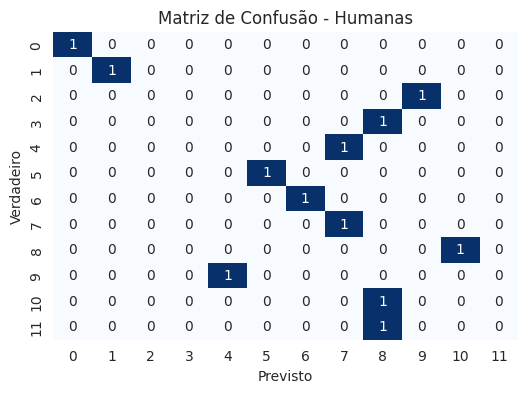

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Saude ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.25      0.33      0.28         6
weighted avg       0.25      0.33      0.28         6

Área Sob a Curva ROC (AUC): 0.6167


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

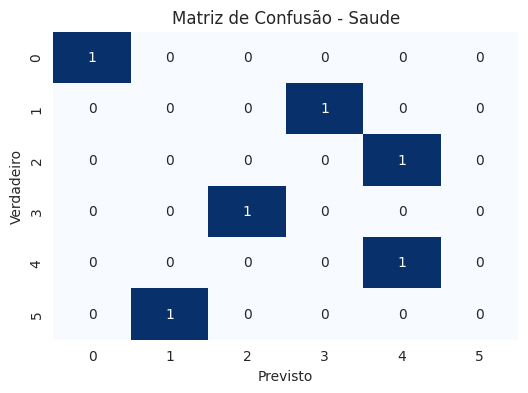

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Biologicas ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.12      0.29      0.17         7
weighted avg       0.12      0.29      0.17         7

Área Sob a Curva ROC (AUC): 0.6190


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

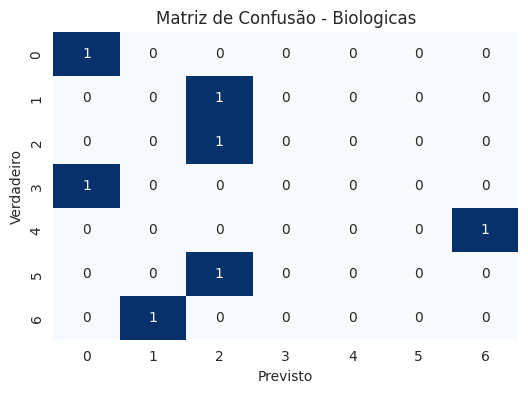

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Exatas ---


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.45        11
   macro avg       0.41      0.45      0.42        11
weighted avg       0.41      0.45      0.42        11

Não foi possível calcular o AUC: Number of classes in y_true not equal to the number of columns in 'y_score'


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

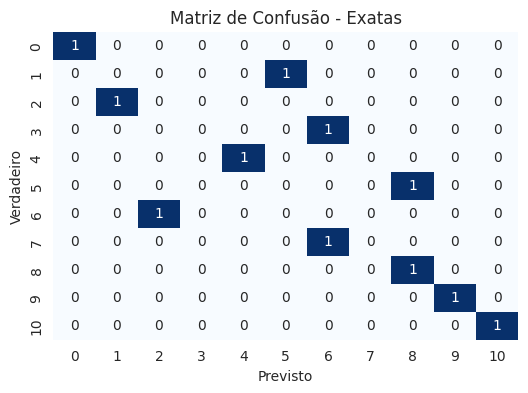

/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Tecnologia ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0

Área Sob a Curva ROC (AUC): 0.4833


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

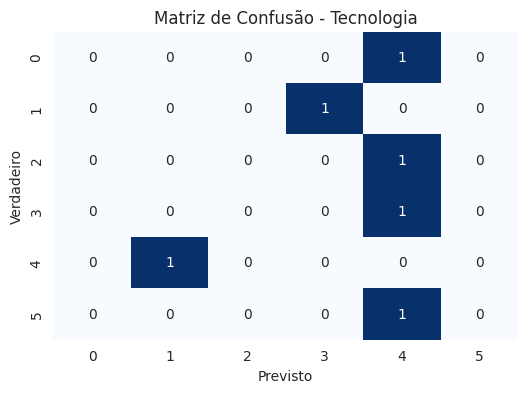

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Artes ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.20      0.30      0.23        10
weighted avg       0.20      0.30      0.23        10

Área Sob a Curva ROC (AUC): 0.6889


/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cecilia/.local/share/virtualenvs/NCJNet-E8OimlyP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

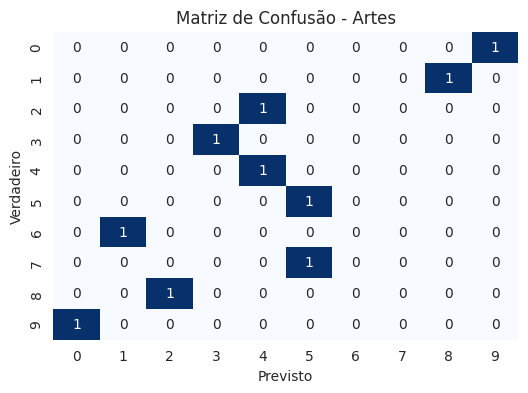

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Linguagens ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Não foi possível calcular o AUC: y should be a 1d array, got an array of shape (2, 2) instead.


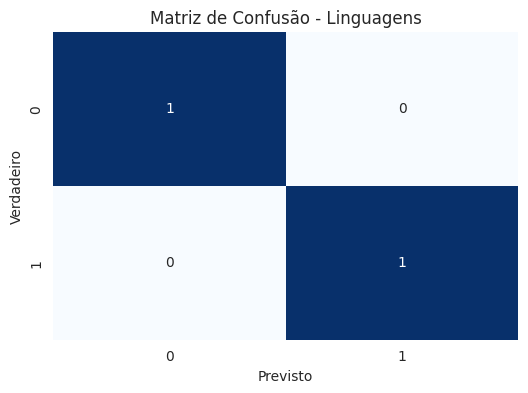

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Comunicacao ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.25      0.25      0.25         4
weighted avg       0.25      0.25      0.25         4

Área Sob a Curva ROC (AUC): 0.5417


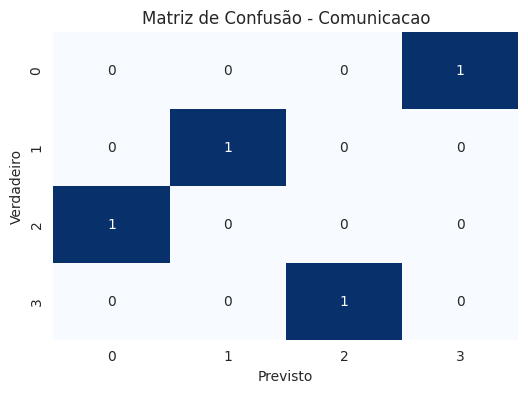

--------------------------------------------------



In [72]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#dicionário com os melhores modelos por área
models = {
    "Humanas": modelos_por_area['Humanas']['model'],
    "Saude": modelos_por_area['Saude']['model'],
    "Biologicas": modelos_por_area['Biologicas']['model'],
    "Exatas": modelos_por_area['Exatas']['model'],
    "Tecnologia": modelos_por_area['Tecnologia']['model'],
    "Artes": modelos_por_area['Artes']['model'],
    "Linguagens": modelos_por_area['Linguagens']['model'],
    "Comunicacao": modelos_por_area['Comunicacao']['model']
}

#dicionário para armazenar os resultados e as curvas ROC
results = {}
roc_curves = {}

#loop para treinar e avaliar cada modelo
for name, model in models.items():
    print(f"--- Treinando e Avaliando Modelo da Área de {name} ---")
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    
    for train, test in kf.split(utils[name]["X"], utils[name]["y"]):
        
        X_train_fold, X_test_fold = utils[name]["X"].iloc[train], utils[name]["X"].iloc[test] 
        y_train_fold, y_test_fold = utils[name]["y"][train], utils[name]["y"][test] 
        
        # Normalização dos dados
        X_train_normalizado = scaler.fit_transform(X_train_fold)
        X_test_normalizado = scaler.transform(X_test_fold)

        #Treina o modelo com esse conjunto de treinamento
        model.fit(X_train_normalizado, y_train_fold)
            
        # Predições
        y_test_pred = model.predict(X_test_normalizado)
        y_proba = model.predict_proba(X_test_normalizado)  # Probabilidades para todas as classes

        acc_scores.append(accuracy_score(y_test_fold, y_test_pred))
        
    if np.max(acc_scores) > modelos_por_area[area]["acc"]:
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = np.max(acc_scores)
    
    # --- métricas ---
    
    #reporte de Classificação (Precisão, Revocação, F1-Score)
    print("\nRelatório de Classificação:")
    report = classification_report(y_test_fold, y_test_pred)
    print(report)
    
    #F1-Score Macro 
    f1_macro = f1_score(y_test_fold, y_test_pred, average='macro')
    
    #AUC (multi-class)
    try:
        auc = roc_auc_score(y_test_fold, y_proba, multi_class='ovr')
        print(f"Área Sob a Curva ROC (AUC): {auc:.4f}")
    except Exception as e:
        auc = None
        print(f"Não foi possível calcular o AUC: {e}")
    
    #armazenando os resultados para o DataFrame final
    results[name] = {
        'Precision (Macro)': f1_score(y_test_fold, y_test_pred, average='macro'),
        'Recall (Macro)': f1_score(y_test_fold, y_test_pred, average='macro'), #recall macro = Precision macro para F1
        'F1-Score (Macro)': f1_macro,
        'AUC': auc
    }
    
    # --- matriz de Confusão ---
    cm = confusion_matrix(y_test_fold, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {name}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()
    
    from sklearn.preprocessing import label_binarize
    
    # Get the number of classes from the model if possible, else from y_test_fold
    if hasattr(model, "classes_"):
        n_classes = len(model.classes_)
    else:
        n_classes = len(np.unique(np.concatenate([y_test_fold, y_test_pred])))
    
    # Defensive: pad y_proba if it has only one column (single class predicted)
    if y_proba.shape[1] != n_classes:
        # Create a full probability array with zeros
        y_proba_full = np.zeros((y_proba.shape[0], n_classes))
        # Find the predicted class index
        if hasattr(model, "classes_"):
            class_indices = {c: i for i, c in enumerate(model.classes_)}
            for idx, c in enumerate(model.classes_):
                y_proba_full[:, c] = y_proba[:, idx]
        else:
            # fallback: just fill the first column
            y_proba_full[:, 0] = y_proba[:, 0]
        y_proba = y_proba_full
    
    y_test_bin = label_binarize(y_test_fold, classes=np.arange(n_classes))
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        try:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        except Exception:
            fpr[i], tpr[i] = np.array([0, 1]), np.array([0, 1])  # fallback for degenerate cases
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc}
    
    print("-" * 50 + "\n")